In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from izhikevich import *
import powerlaw
import colorcet as cc
import holoviews as hv
hv.notebook_extension("matplotlib")

SyntaxError: invalid syntax (izhikevich.py, line 8)

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.5255309958


Calculating best minimal value for power law fit


1.27150347206


Calculating best minimal value for power law fit


1.3398844194


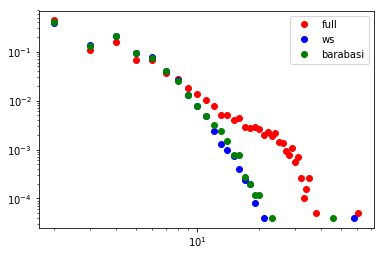

In [25]:
fig = plt.figure()

colors = ['r', 'b', 'g']
for c,net_type in enumerate(['full', 'ws', 'barabasi']):
    adj_mat, neg_nodes = create_network(size=50, neighbours=5,
                                        frac_neg=0.5, net_type=net_type)
    all_act = izhikevich(adj_mat, neg_nodes, time=100000)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    plt.loglog(ii, avalprobs[ii], colors[c] + 'o', label=net_type)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
#     print(fitted_pl.alpha)

plt.legend()
plt.show()

In [7]:
##bins = np.arange(1, 35, 1)
##plt.hist(aval_sizes, bins=bins, alpha=0.5)
##plt.title('Avalanche size distribution')
##plt.xlabel('Size')
##plt.ylabel('Count')
##plt.show()

##proj_act = np.sum(all_act, 0)
##plt.plot(proj_act)
##plt.show()

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


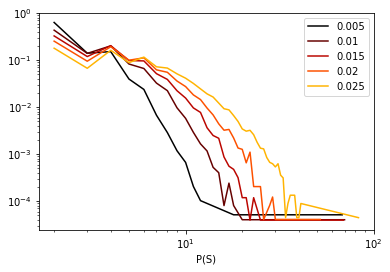

In [55]:
fig = plt.figure()
alpha_list = []

for j,c in enumerate(np.linspace(0.005, 0.025, 5)):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=0., net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=10**5, a_pars=(c, c))

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    plt.loglog(ii, avalprobs[ii], color=cc.palette["linear_kryw_0_100_c71"][int(j*50)], label=c)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)

plt.xlabel("Size")
plt.xlabel("P(S)")
plt.legend()
plt.show()

In [84]:
plt.plot(np.linspace(0.005, 0.025, 5), alpha_list, 'o')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (8,)

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


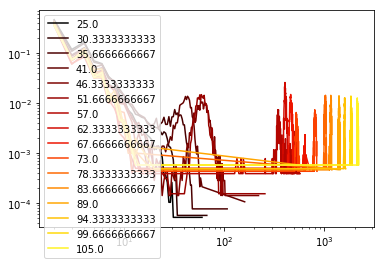

In [79]:
times = []
sizes = np.linspace(25, 100, 16)
alpha_list = []
distrs = []
for j,size in enumerate(sizes):
    start_t = time.time()
    adj_mat, neg_nodes = create_network(size=int(size), neighbours=2, frac_neg=0., net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=10**6)
    times.append(time.time()-start_t)
    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    distrs.append((ii, avalprobs))
    plt.loglog(ii, avalprobs[ii], color=cc.palette["linear_kryw_0_100_c71"][int(j*16)], label=size)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)
plt.legend()
plt.show()

## Inhibition 

Calculating best minimal value for power law fit
/home/abel/Documents/anaconda2/envs/ml1labs/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


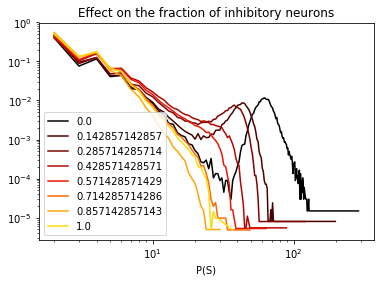

In [83]:
fig = plt.figure()
alpha_list = []
inp=np.linspace(0, 1, 8)
for j,c in enumerate(inp):
    adj_mat, neg_nodes = create_network(size=50, neighbours=2, frac_neg=c, net_type='full')
    all_act = izhikevich(adj_mat, neg_nodes, time=10**6)

    aval_times, aval_sizes = get_avalanches(all_act)
    y = np.bincount(np.array(aval_sizes))
    ii = np.nonzero(y)[0]
    avalprobs = y/len(aval_sizes)
    plt.loglog(ii, avalprobs[ii], color=cc.palette["linear_kryw_0_100_c71"][int(j*32)], label=c)
    fitted_pl = powerlaw.Fit(avalprobs[ii])
    alpha_list.append(fitted_pl.alpha)

plt.xlabel("Size")
plt.xlabel("P(S)")
plt.title("Effect on the fraction of inhibitory neurons")
plt.legend()
plt.show()

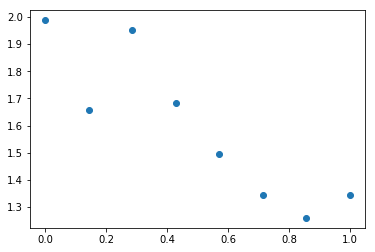

In [88]:
plt.plot(inp, alpha_list, 'o')
plt.show()

## Barabasi

In [ ]:
adj_mat, neg_nodes = create_network(size=500, neighbours=2, frac_neg=0.9, net_type='barabasi')
all_act = izhikevich(adj_mat, neg_nodes, time=10**6)

aval_times, aval_sizes = get_avalanches(all_act)
y = np.bincount(np.array(aval_sizes))
ii = np.nonzero(y)[0]
avalprobs = y/len(aval_sizes)
plt.loglog(ii, avalprobs[ii])
fitted_pl = powerlaw.Fit(avalprobs[ii])
plt.show()